# Assessment of Air Quality

# Part2 Mobile Emissions

##### by Jingxi
MOBILE SOURCE EMISSIONS  

a. Direct Mobile Source Emissions—fleet vehicles owned (or leased) and operated by the applicant and associated with the project. 

b. Indirect Mobile Source Emissions—emissions from vehicle trips to or from the project site during its operation that are not owned or operated by the applicant.   

In this notebook, I plan to calculate the mobile source emissions and join with the transportation data to predict the emission for the proposed area.

In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd

import rasterio
import rasterstats
from rasterio.mask import mask
from shapely.geometry import box

from fiona.crs import from_epsg
import pycrs

from rasterio.plot import show, show_hist
from rasterstats import point_query, zonal_stats
from IPython.display import Image

import urllib
#import mplleaflet as mpll
% pylab inline

Populating the interactive namespace from numpy and matplotlib


/nfshome/jz3309/.conda/envs/myEnv/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['box', 'show']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


### PM2.5

In [2]:
raster_PM25 = rasterio.open("../airquality/aa8_pm300m//") #2016

In [3]:
noisestudyarea= gpd.GeoDataFrame.from_file('noisestudyarea/redhook.shp')

In [4]:
#import the points
import zipfile
zip_ref = zipfile.ZipFile('data/road-points.zip', 'r')
zip_ref.extractall('data/roadpoints')
zip_ref.close()

In [5]:
roadpoint = gpd.GeoDataFrame.from_file('data/roadpoints/layers/POINT.shp')

In [6]:
roadpoint.to_crs(raster_PM25.crs,inplace=True)

In [7]:
from rasterstats import point_query

In [8]:
shp= 'data/roadpoints/layers/POINT.shp'
rast = '../airquality/aa8_pm300m//'
roadpoint['pm252016'] = point_query(roadpoint['geometry'],rast)

In [9]:
roadpoint_ = roadpoint[roadpoint['pm252016']>0]

/nfshome/jz3309/.conda/envs/myEnv/lib/python2.7/site-packages/pysal/__init__.py:65: VisibleDeprecationWarning: PySAL's API will be changed on 2018-12-31. The last release made with this API is version 1.14.4. A preview of the next API version is provided in the `pysal` 2.0 prelease candidate. The API changes and a guide on how to change imports is provided at https://migrating.pysal.org
  ), VisibleDeprecationWarning)


Text(0.5,1,'PM2.5 generated on roads')

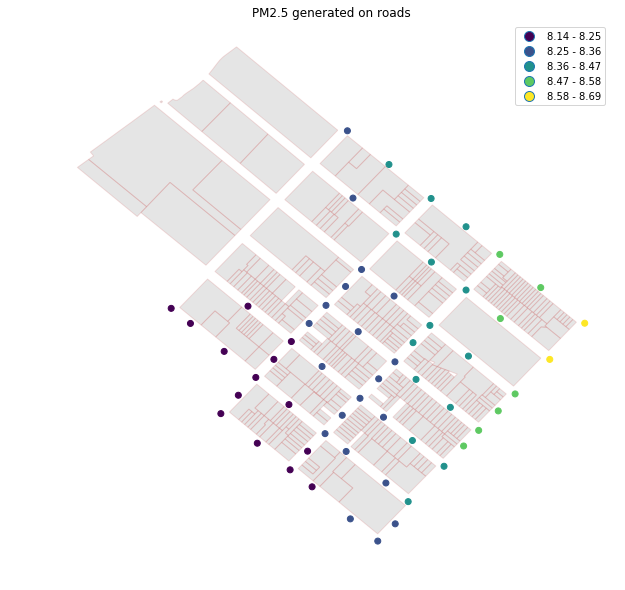

In [10]:
fig = plt.figure(figsize=(10,10)) 
ax = fig.add_subplot(111)
roadpoint_.plot(column='pm252016',ax=ax,legend=True,scheme='equal_interval')
noisestudyarea.plot(ax=ax,color='grey',alpha=0.2,edgecolor='indianred')
ax.axis('off')
ax.set_title('PM2.5 generated on roads')

In [11]:
roadpoint_.describe()

,pm252016
count,57.000000
mean,8.340145
std,0.125992
min,8.138796
25%,8.249672
50%,8.330918
75%,8.422512
max,8.692651


### NO2

In [12]:
raster_NO2=rasterio.open("../airquality/data/aa8_no2300m//") #2016

In [13]:
shp= 'data/studypoints/layers/POINT.shp'
rast = '../airquality/data/aa8_no2300m//'
roadpoint['no22016'] = point_query(roadpoint['geometry'],rast)

In [14]:
roadpoint = roadpoint[(roadpoint['no22016']>0)| (roadpoint['pm252016']>0)]

Text(0.5,1,'NO2 generated on roads')

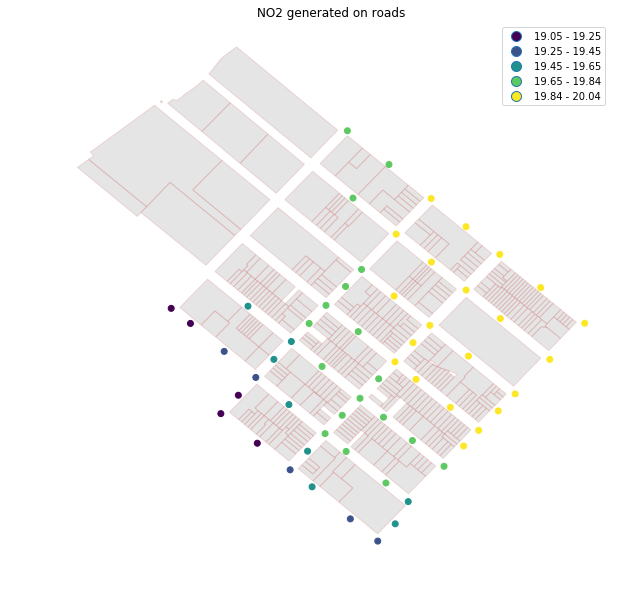

In [15]:
fig = plt.figure(figsize=(10,10)) 
ax = fig.add_subplot(111)
roadpoint.plot(column='no22016',ax=ax,legend=True,scheme='equal_interval')
noisestudyarea.plot(ax=ax,color='grey',alpha=0.2,edgecolor='indianred')
ax.axis('off')
ax.set_title('NO2 generated on roads')

### NO

In [16]:
raster_NO2=rasterio.open("../airquality/data/aa8_no300m//") #2016

In [17]:
shp= 'data/studypoints/layers/POINT.shp'
rast = '../airquality/data/aa8_no300m//'
roadpoint['no2016'] = point_query(roadpoint['geometry'],rast)

In [18]:
roadpoint = roadpoint[roadpoint['no2016']>0]

Text(0.5,1,'NO generated on roads')

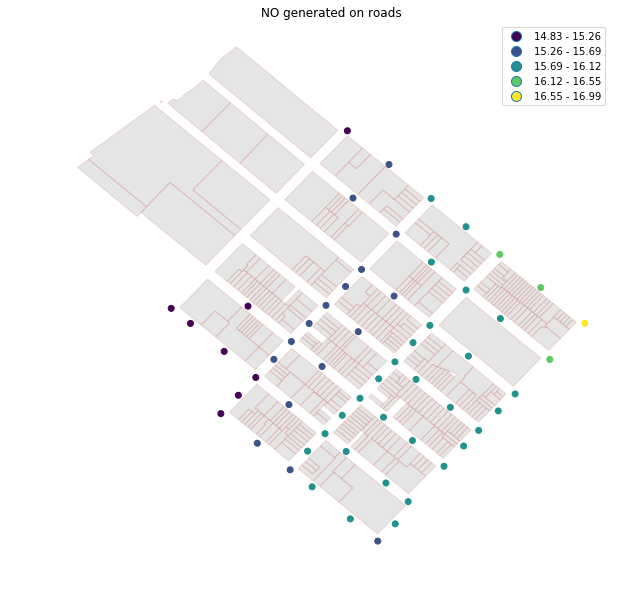

In [19]:
fig = plt.figure(figsize=(10,10)) 
ax = fig.add_subplot(111)
roadpoint.plot(column='no2016',ax=ax,legend=True,scheme='equal_interval')
noisestudyarea.plot(ax=ax,color='grey',alpha=0.2,edgecolor='indianred')
ax.axis('off')
ax.set_title('NO generated on roads')

### SO2

In [20]:
raster_NO2=rasterio.open("../airquality/data/w8_so2300m//") #2016

In [21]:
shp= 'data/studypoints/layers/POINT.shp'
rast = '../airquality/data/aa8_no2300m//'
roadpoint['so22016'] = point_query(roadpoint['geometry'],rast)

In [22]:
roadpoint = roadpoint[roadpoint['so22016']>0]

Text(0.5,1,'SO2 generated on roads')

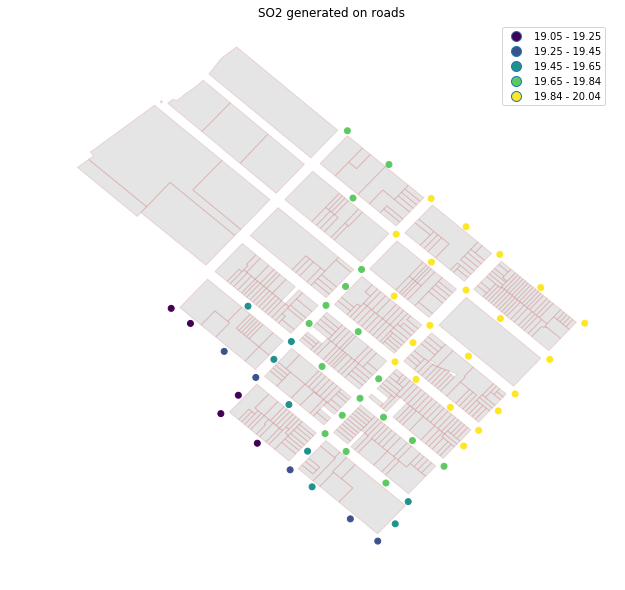

In [23]:
fig = plt.figure(figsize=(10,10)) 
ax = fig.add_subplot(111)
roadpoint.plot(column='so22016',ax=ax,legend=True,scheme='equal_interval')
noisestudyarea.plot(ax=ax,color='grey',alpha=0.2,edgecolor='indianred')
ax.axis('off')
ax.set_title('SO2 generated on roads')

### O3

In [24]:
raster_NO2=rasterio.open("../airquality/data/s7_o3300m//") #2016

In [25]:
shp= 'data/studypoints/layers/POINT.shp'
rast = '../airquality/data/aa8_no2300m//'
roadpoint['o32016'] = point_query(roadpoint['geometry'],rast)

In [26]:
roadpoint = roadpoint[roadpoint['o32016']>0]

Text(0.5,1,'O3 generated on roads')

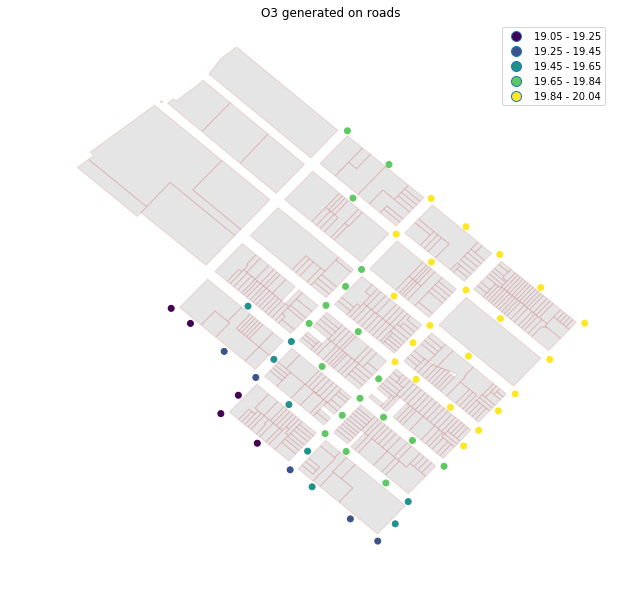

In [27]:
fig = plt.figure(figsize=(10,10)) 
ax = fig.add_subplot(111)
roadpoint.plot(column='o32016',ax=ax,legend=True,scheme='equal_interval')
noisestudyarea.plot(ax=ax,color='grey',alpha=0.2,edgecolor='indianred')
ax.axis('off')
ax.set_title('O3 generated on roads')

In [28]:
roadpoint.describe()

,pm252016,no22016,no2016,so22016,o32016
count,57.000000,57.000000,57.000000,57.000000,57.000000
mean,8.340145,19.703960,15.681457,19.703960,19.703960
std,0.125992,0.261096,0.374977,0.261096,0.261096
min,8.138796,19.047225,14.831375,19.047225,19.047225
25%,8.249672,19.472404,15.381303,19.472404,19.472404
50%,8.330918,19.806635,15.752206,19.806635,19.806635
75%,8.422512,19.897681,15.912307,19.897681,19.897681
max,8.692651,20.044139,16.985667,20.044139,20.044139


### read in transportation and labor data

In [29]:
trans = pd.read_csv('data/transport_and_labor.csv')

In [30]:
trans

,Unnamed: 0,total,drive,car_truck_alone,car_truck_carpool,public_transport,subway,ferry,bus,biking,...,NAME_x,state,county,tract,NAME_y,LaborForce,PrimeAge,Over65,55-64,Under25
0,284,1775,241,152,89,1236,1002,0,234,16,...,"Census Tract 85, Kings County, New York",36,47,8500,"Census Tract 85, Kings County, New York",2567,1394,82,213,878
1,423,863,88,78,10,445,348,0,91,105,...,"Census Tract 59, Kings County, New York",36,47,5900,"Census Tract 59, Kings County, New York",912,864,5,33,10
2,564,1373,283,192,91,574,439,0,135,180,...,"Census Tract 53, Kings County, New York",36,47,5300,"Census Tract 53, Kings County, New York",1508,1160,23,207,118
